In [1]:
import pandas as pd

In [2]:
import tensorflow as tf

: 

In [2]:
dataset=pd.read_csv("netflix_missing.csv")

In [3]:
dataset.head(10)

,type,title,rating,ratinglevel,ratingdescription,release_year,user_rating_score,user_rating_size
0,TVshow,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80.0,2004.0,82.0,80.0
1,TVshow,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100.0,2006.0,NaN,82.0
2,TVshow,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90.0,2016.0,98.0,80.0
3,TVshow,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90.0,2008.0,98.0,80.0
4,TVshow,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70.0,2014.0,94.0,80.0
5,TVshow,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,90.0,2016.0,95.0,80.0
6,TVshow,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,110.0,2013.0,97.0,80.0
7,TVshow,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,90.0,2017.0,91.0,80.0
8,movie,The Walking Dead,TV-MA,For mature audiences. May not be suitable for...,110.0,2015.0,98.0,80.0
9,movie,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,90.0,2016.0,96.0,80.0


In [4]:
dataset.shape

(1000, 8)

In [5]:
dataset.isnull()

,type,title,rating,ratinglevel,ratingdescription,release_year,user_rating_score,user_rating_size
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,True,False,False,False,False,False,False
996,False,False,False,False,False,False,True,False
997,False,False,False,False,False,False,True,False
998,False,False,False,False,False,False,True,False


In [6]:
missing_value=dataset.isnull().sum()
missing_value

type                   0
title                  6
rating                 6
ratinglevel           71
ratingdescription      6
release_year           6
user_rating_score    397
user_rating_size       7
dtype: int64

In [7]:
total_missing_vaue=missing_value.sum()
total_missing_vaue

np.int64(499)

In [8]:
#percentage of missing data
(missing_value/dataset.shape[0])*100

type                  0.0
title                 0.6
rating                0.6
ratinglevel           7.1
ratingdescription     0.6
release_year          0.6
user_rating_score    39.7
user_rating_size      0.7
dtype: float64

In [9]:
#missing data percentage overall dataset
(total_missing_vaue/(dataset.shape[0]*dataset.shape[1]))*100

np.float64(6.2375)

In [10]:
# fill data overall dataset
fill_data=dataset.notnull()
fill_data

,type,title,rating,ratinglevel,ratingdescription,release_year,user_rating_score,user_rating_size
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
995,True,False,True,True,True,True,True,True
996,True,True,True,True,True,True,False,True
997,True,True,True,True,True,True,False,True
998,True,True,True,True,True,True,False,True


In [11]:
#fill data as row
fill_data.sum()

type                 1000
title                 994
rating                994
ratinglevel           929
ratingdescription     994
release_year          994
user_rating_score     603
user_rating_size      993
dtype: int64

In [12]:
#total fill data
fill_data.sum().sum()

np.int64(7501)

Grapical representation of missing_value

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

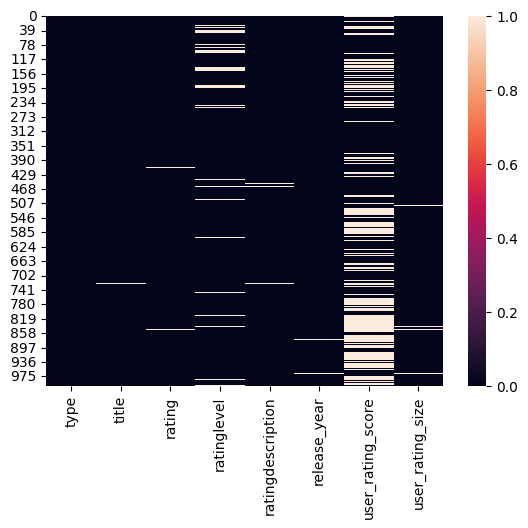

In [14]:
sns.heatmap(dataset.isnull())
plt.show()

Handling missing value

In [15]:
#deleat coumn
deleat_column=dataset.drop(columns=["user_rating_score"])
print(deleat_column)

       type                    title rating  \
0    TVshow             White Chicks  PG-13   
1    TVshow      Lucky Number Slevin      R   
2    TVshow           Grey's Anatomy  TV-14   
3    TVshow             Prison Break  TV-14   
4    TVshow    How I Met Your Mother  TV-PG   
..      ...                      ...    ...   
995   movie                      NaN     PG   
996   movie  The Secret Life of Pets     PG   
997   movie         Precious Puppies   TV-G   
998   movie              Beary Tales   TV-G   
999   movie          Growing Up Wild      G   

                                           ratinglevel  ratingdescription  \
0    crude and sexual humor, language and some drug...               80.0   
1    strong violence, sexual content and adult lang...              100.0   
2    Parents strongly cautioned. May be unsuitable ...               90.0   
3    Parents strongly cautioned. May be unsuitable ...               90.0   
4    Parental guidance suggested. May not be suita

In [16]:
deleat_column.shape

(1000, 7)

In [17]:
deleat_column.isnull().sum()

type                  0
title                 6
rating                6
ratinglevel          71
ratingdescription     6
release_year          6
user_rating_size      7
dtype: int64

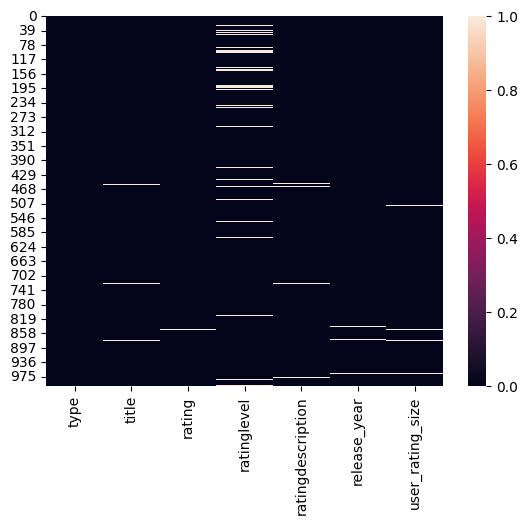

In [18]:
sns.heatmap(deleat_column.isnull())
plt.show()

In [19]:
# deleat missing data rows
deleat_rows=deleat_column.dropna()
print(deleat_rows)

       type                      title rating  \
0    TVshow               White Chicks  PG-13   
1    TVshow        Lucky Number Slevin      R   
2    TVshow             Grey's Anatomy  TV-14   
3    TVshow               Prison Break  TV-14   
4    TVshow      How I Met Your Mother  TV-PG   
..      ...                        ...    ...   
993   movie  Wiener Dog Internationals      G   
994   movie                   Pup Star      G   
996   movie    The Secret Life of Pets     PG   
997   movie           Precious Puppies   TV-G   
998   movie                Beary Tales   TV-G   

                                           ratinglevel  ratingdescription  \
0    crude and sexual humor, language and some drug...               80.0   
1    strong violence, sexual content and adult lang...              100.0   
2    Parents strongly cautioned. May be unsuitable ...               90.0   
3    Parents strongly cautioned. May be unsuitable ...               90.0   
4    Parental guidance sug

In [20]:
deleat_rows.shape

(906, 7)

In [21]:
deleat_rows.isnull().sum()

type                 0
title                0
rating               0
ratinglevel          0
ratingdescription    0
release_year         0
user_rating_size     0
dtype: int64

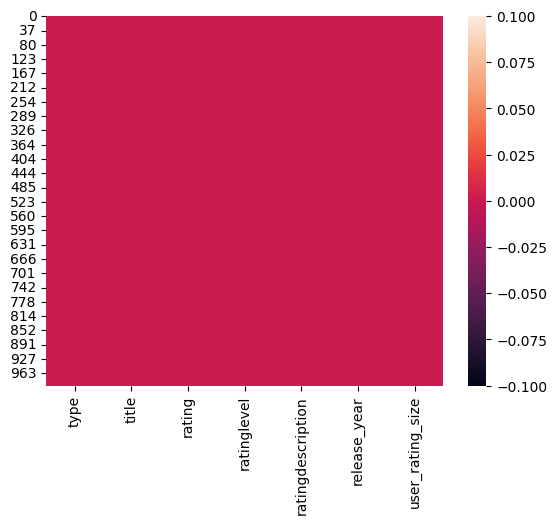

In [22]:
sns.heatmap(deleat_rows.isnull())
plt.show()

Filling missing data

In [23]:
#filling data mode method
dataset["ratinglevel"].fillna(dataset["ratinglevel"].mode()[0],inplace=True)
print(dataset)

       type                    title rating  \
0    TVshow             White Chicks  PG-13   
1    TVshow      Lucky Number Slevin      R   
2    TVshow           Grey's Anatomy  TV-14   
3    TVshow             Prison Break  TV-14   
4    TVshow    How I Met Your Mother  TV-PG   
..      ...                      ...    ...   
995   movie                      NaN     PG   
996   movie  The Secret Life of Pets     PG   
997   movie         Precious Puppies   TV-G   
998   movie              Beary Tales   TV-G   
999   movie          Growing Up Wild      G   

                                           ratinglevel  ratingdescription  \
0    crude and sexual humor, language and some drug...               80.0   
1    strong violence, sexual content and adult lang...              100.0   
2    Parents strongly cautioned. May be unsuitable ...               90.0   
3    Parents strongly cautioned. May be unsuitable ...               90.0   
4    Parental guidance suggested. May not be suita

/tmp/ipykernel_1650/3835156050.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["ratinglevel"].fillna(dataset["ratinglevel"].mode()[0],inplace=True)


In [24]:
dataset["title"].fillna(dataset["title"].mode()[0],inplace=True)
dataset.isnull().sum()

/tmp/ipykernel_1650/3357720773.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["title"].fillna(dataset["title"].mode()[0],inplace=True)


type                   0
title                  0
rating                 6
ratinglevel            0
ratingdescription      6
release_year           6
user_rating_score    397
user_rating_size       7
dtype: int64

In [25]:
dataset["rating"].fillna(dataset["rating"].mode()[0],inplace=True)
dataset.isnull().sum()

/tmp/ipykernel_1650/4089380557.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["rating"].fillna(dataset["rating"].mode()[0],inplace=True)


type                   0
title                  0
rating                 0
ratinglevel            0
ratingdescription      6
release_year           6
user_rating_score    397
user_rating_size       7
dtype: int64

In [26]:
dataset.fillna(method="bfill",inplace=True)
dataset.isnull().sum()

/tmp/ipykernel_1650/2544014541.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method="bfill",inplace=True)


type                 0
title                0
rating               0
ratinglevel          0
ratingdescription    0
release_year         0
user_rating_score    0
user_rating_size     0
dtype: int64

In [27]:
dataset.select_dtypes(include="object").columns

Index(['type', 'title', 'rating', 'ratinglevel'], dtype='object')

one hot encoding

In [28]:
new_dataset=dataset[["type"]]
new_dataset

,type
0,TVshow
1,TVshow
2,TVshow
3,TVshow
4,TVshow
...,...
995,movie
996,movie
997,movie
998,movie


In [29]:
pd.get_dummies(new_dataset)

,type_TVshow,type_movie
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
995,False,True
996,False,True
997,False,True
998,False,True


one hot encoding using skit_learn

In [42]:
import numpy as np

In [30]:
from sklearn.preprocessing import OneHotEncoder

In [45]:
ohe=OneHotEncoder(drop="first")

In [46]:
arr=ohe.fit_transform(new_dataset).toarray()
arr

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [48]:
pd.DataFrame(arr,columns=["type_movie"])

,type_movie
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
995,1.0
996,1.0
997,1.0
998,1.0
